#### XYZ Company has offices in four different zones. The company wishes to investigate the following :

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


df= pd.read_csv('Sales_data_zone_wise.csv')
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [3]:
df.isnull().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [9]:
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


#### 1. The mean sales generated by each zone

In [7]:
print(f"Mean sales generated in Zone-A is : {df['Zone - A'].mean():.3f}")
print(f"Mean sales generated in Zone-B is : {df['Zone - B'].mean():.3f}")
print(f"Mean sales generated in Zone-C is : {df['Zone - C'].mean():.3f}")
print(f"Mean sales generated in Zone-D is : {df['Zone - D'].mean():.3f}")

Mean sales generated in Zone-A is : 1540493.138
Mean sales generated in Zone-B is : 1755559.586
Mean sales generated in Zone-C is : 1772871.034
Mean sales generated in Zone-D is : 1842926.759


#### 2. Total sales generated by all the zones for each month.

         Month  Sales Total
0    Month - 1      7022544
1    Month - 2      7152303
2    Month - 3      6475939
3    Month - 4      8174449
4    Month - 5      5995328
5    Month - 6      7151387
6    Month - 7      7287108
7    Month - 8      7816299
8    Month - 9      6703395
9   Month - 10      7128210
10  Month - 11      7032783
11  Month - 12      6111084
12  Month - 13      5925424
13  Month - 14      7155515
14  Month - 15      5934156
15  Month - 16      6506659
16  Month - 17      7149383
17  Month - 18      7083490
18  Month - 19      6971953
19  Month - 20      7124599
20  Month - 21      7389597
21  Month - 22      7560001
22  Month - 23      6687919
23  Month - 24      7784747
24  Month - 25      6095918
25  Month - 26      6512360
26  Month - 27      6267918
27  Month - 28      7470920
28  Month - 29      6772277


<AxesSubplot:>

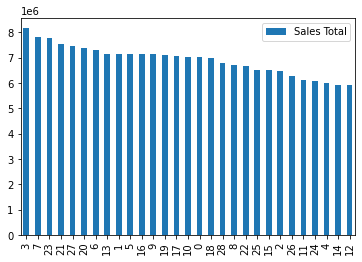

In [59]:
warnings.filterwarnings("ignore")
df_month = df[['Month']]
df_month['Sales Total']= df.sum(axis=1)
print(df_month)
df_month.sort_values('Sales Total', ascending=False).plot(kind='bar')

#### 3. Check whether all the zones generate the same amount of sales.

H0: Sales generated by all 4 zones are same

H1: Sales generated by atleast one zone is different

alpha = .05

In [58]:
from scipy.stats import f_oneway

Fvalue,p = f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])
print('F-value is : ',Fvalue)
print('p is : ',p)

alpha=.05


if p > alpha:
    print('Sample accept null hypothesis')
else:
    print('Sample fails to accept null hypothesis')

F-value is :  5.672056106843581
p is :  0.0011827601694503335
Sample fails to accept null hypothesis


Inference:
    
Here p is less than the alpha, so we fail to accept the null hpothesis. Hence conclude that the sales generated by each zones are different